# Google repo hyperparameters

**Goal:** I was wondering if _maybe_ I was just having poor choices of hps(?), i.e, maybe the CNN wasn't expressive enough?

In [10]:
import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

**What's the comparison with the baseline when I keep the other parameters the same?**

In [11]:
# alpha=1
# roll_avg=100

# for qd,l,i in zip(['-Q64','-Q128','-Q256'],
#                    ['H=16,Q=64','H=16,Q=128','H=16,Q=256'],
#                    np.linspace(0.05,.95,3)):

#     # for base in ['2rings-sqrtD','sa']
    
#     for tag,label,di,ls in zip(['warm','T3'],['T=2','T=3'],[-.05,.05],['-','--']):
#         color = cmap(i+di)
#         fname = f'code/models/rings-sqrtD{qd}-{tag}/loss.json'
#         print(fname)
#         try:
#             with open(fname) as f:
#                 ld = pd.Series(json.load(f))
#             print(len(ld),'last 10',ld.rolling(roll_avg).mean()[-10:].values)
#             plt.plot(ld.rolling(roll_avg).mean()[roll_avg:].values,
#                      label=l,alpha=alpha,color=color,ls=ls)

#         except FileNotFoundError:
#             print(f'^ this file doesn\'t exist yet')

# plt.title('2 RINGS, $1\sqrt{D}$ softmax temp, H=16 for CNN',loc='right')
# plt.xlabel('iterations')
# plt.ylabel('Loss')
# # plt.ylim(0,.06)
# plt.legend()

Fun fact... when you go bigger, the model "grocs" for longer!

In [12]:
import matplotlib as mlp
try:
    cmap = mlp.colormaps.get_cmap('magma')
except:
    cmap =mlp.colorbar.cm.magma

code/models/sa-Q64-bs256-const-lr/loss.json
420001 0.05707793235778809
code/models/sa-Q64-bs256-scale-lr/loss.json
418001 0.03827318346127868
code/models/sa-Q64-bs512-const-lr/loss.json
101001 6.2724924325943
code/models/sa-Q64-bs512-scale-lr/loss.json
32001 0.16045172452926637
code/models/sa-Q64-bs1024-const-lr/loss.json
126001 0.14338531896471976
code/models/sa-Q64-bs1024-scale-lr/loss.json
24001 0.09643957570195198


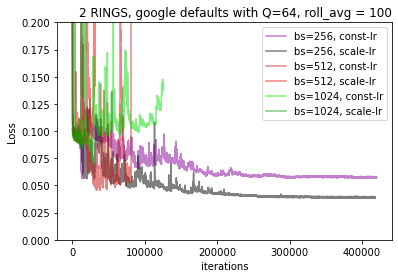

code/models/sa-Q128-bs256-const-lr/loss.json
403001 0.0649796636402607
code/models/sa-Q128-bs256-scale-lr/loss.json
402001 0.08175099156796932
code/models/sa-Q128-bs512-const-lr/loss.json
248001 0.05637465886771679
code/models/sa-Q128-bs512-scale-lr/loss.json
246001 0.08471826009452343
code/models/sa-Q128-bs1024-const-lr/loss.json
132001 0.10129273377358913
code/models/sa-Q128-bs1024-scale-lr/loss.json
9001 0.08654793709516526


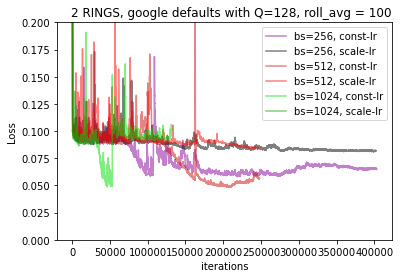

code/models/sa-Q256-bs256-const-lr/loss.json
444001 0.0878166275471449
code/models/sa-Q256-bs256-scale-lr/loss.json
428001 0.0889974034577608
code/models/sa-Q256-bs512-const-lr/loss.json
264001 0.027750120256096123
code/models/sa-Q256-bs512-scale-lr/loss.json
93001 1.5415372812747956
code/models/sa-Q256-bs1024-const-lr/loss.json
114001 0.038660029247403145
code/models/sa-Q256-bs1024-scale-lr/loss.json
6001 0.13380873516201974


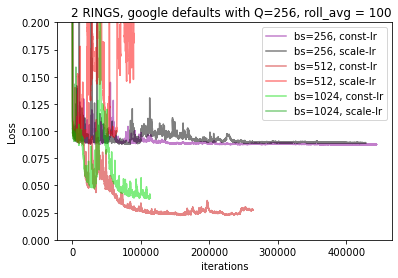

In [13]:
alpha=.5
roll_avg = 100
cmap = mlp.colorbar.cm.get_cmap('nipy_spectral')



for Q in [64,128,256]:
    for bs,i in zip([256,512,1024],[.05,.9,.5]):

        for tag,di in zip(['const-lr','scale-lr'],[.05,-.05]):

            cID = f'sa-Q{Q}-bs{bs}-{tag}'
            c = cmap(i+di)

            fname = f'code/models/{cID}/loss.json'
            print(fname)
            try:
                with open(fname) as f:
                    ld = pd.Series(json.load(f))
                print(len(ld),ld.rolling(roll_avg).mean().values[-1])
                plt.plot(ld.rolling(roll_avg).mean()[roll_avg:].values,
                         label=f'bs={bs}, {tag}',alpha=alpha,color=c)

            except FileNotFoundError:
                print(f'^ this file doesn\'t exist yet')

    plt.title(f'2 RINGS, google defaults with Q={Q}, roll_avg = {roll_avg}',loc='right')
    plt.xlabel('iterations')
    plt.ylabel('Loss')
    plt.ylim(0,.2)
    plt.legend()

    plt.show()

Should I kill the constant learning rate experiments?